In [56]:
############################################
#          CREATION OF RFM FRAME           #
############################################

import pandas as pd

#original
df = pd.read_csv("eshop.csv");
#rename "Customer ID" to "CustomerID"
df.columns = ["CustomerID","Date","Subtotal","Country"];

#monetary is sum of subtotal
#sum() will automatically drop columns which can't be summed
monetary   = df.groupby(["CustomerID"])['Subtotal'].sum();
#Doesn't matter which column i take as frequency
#Group by CustomerID, therefore all columns contain the count of CustomerIDs
frequency  = df.groupby(["CustomerID"])['Country'].count();

#Set a fixed today date to stay deterministic 
#12/19/2015 - this is the newest recorded time in the dataset
#Today date could be for example 12/24/2018, but date 12/19/2015 is more useful in modified RFM data frame,
#therefore I use it also here, to stay consistent
today = pd.datetime(2015,12,19);

#Keep only 'Date' column and drop other columns
#I drop only 'Subtotal' - other columns will be dropped automatically by df.groupby(["CustomerID"]).min()
df = df.drop("Subtotal",axis=1);
#Convert date to days passed since the the order until now
df['Date'] = (today-pd.to_datetime(df["Date"]));
#Convert to integers
df['Date'] = df['Date'].dt.days;
#Take the minimum of days - the most recent order
#min() drops column 'Country', since it doesn't make sense to take min of string
recency    = df.groupby(["CustomerID"])['Date'].min();

#rfm dataframe
rfm = pd.concat([recency,frequency,monetary],axis=1);
rfm.columns = ["Recency","Frequency","Monetary"];
#rfm.drop(rfm.index[0]);
display(rfm);

Recency  Frequency  Monetary
CustomerID                              
7               311          3     15.54
9              3050          1     13.20
30             3025          1     36.20
34             3103          1     86.00
38             3097          1     38.40
41             2432          1     18.50
47             3092          1     53.50
48             3069          1     39.30
53             1517          1      9.10
61             3080          1      7.00
62             3054          1     71.40
64             2253          2    188.79
67             3043          1      2.50
73             1606          1     23.96
77              409          1     23.39
78             3073          1     55.50
79             3073          1     31.70
82             3069          1    110.80
87             2116          1     15.09
96             3042          1     63.60
98             2081          1    121.93
101            2298          2    108.65
115             411          7    904.48
129            2293          2     86.52
131            3033          1    113.40
136             832          3    115.50
153            2556          1     35.15
157            1878          2    177.92
166            3013          1     16.00
167              72          2     69.16
...             ...        ...       ...
15327             5          1    170.63
15328             5          1     38.00
15329             5          1     49.78
15330             4          1     61.95
15331             4          1      9.49
15332             4          1     50.91
15333             4          1     42.38
15334             4          1      4.24
15335             4          1    272.28
15336             4          1     24.80
15337             4          1      7.68
15339             3          1     47.23
15340             3          1      7.18
15341             3          1     49.61
15342             3          1    118.86
15345             2          1     93.28
15346             2          1     46.95
15347             2          1     55.20
15348             2          1    182.44
15350             1          1      9.82
15351             1          1     72.14
15352             1          1     25.31
15353             1          1     20.34
15354             1          1    346.25
15355             1          1     89.16
15356             1          1     31.87
15357             1          1      6.10
15358             1          1    153.23
15359             0          1     19.15
15360             0          1    139.10

[12829 rows x 3 columns]

In [57]:
#########################
#     MODIFIED RFM      #
#########################

#Recency = "max (number of months since last purchase,1)"
#Frequency = "max (number of purchases in last 12 months,1)"
#Monetary = "Max spent for a single purchase".

#My intuition is, that by modifying the original data, I will create more similar points in the universe
#Therefore there will be better clusters, but the information about the customers we get from the clustering 
#might be negatively affected by the data transformation (we get simpler data, but some information is lost by the transformation)

import math;

#original
df = pd.read_csv("eshop.csv");
#rename "Customer ID" to "CustomerID"
df.columns = ["CustomerID","Date","Subtotal","Country"];

#Set a fixed today date to be deterministic 
#12/19/2015 - the newest recorded time in the dataset
today = pd.datetime(2015,12,19);
#Convert date to days passed since the the order until now
df['Date'] = (today-pd.to_datetime(df["Date"]));
#Convert to integers
df['Date'] = df['Date'].dt.days;

#monetary is max of subtotal
#max() will automatically drop columns which doesn't make sense to have max function applied to them
monetary_mod   = df.groupby(["CustomerID"])['Subtotal'].max();
monetary_mod = monetary_mod.apply(lambda x: max(1,x));

recency_mod  = df.groupby(["CustomerID"])['Date'].min();
#Number of months since last purchase is approximate
recency_mod  = recency_mod.apply(lambda x: max(1,math.ceil(x/30.4375)));

frequency_mod = df[df['Date'] <= 365].groupby("CustomerID")['Date'].count();


#modified rfm dataframe
rfm_mod = pd.concat([recency_mod,frequency_mod,monetary_mod],axis=1);
rfm_mod.columns = ["Recency","Frequency","Monetary"];
rfm_mod = rfm_mod.fillna(1);
display(rfm_mod);

Recency  Frequency  Monetary
CustomerID                              
7                11        1.0     13.28
9               101        1.0     13.20
30              100        1.0     36.20
34              102        1.0     86.00
38              102        1.0     38.40
41               80        1.0     18.50
47              102        1.0     53.50
48              101        1.0     39.30
53               50        1.0      9.10
61              102        1.0      7.00
62              101        1.0     71.40
64               75        1.0    131.19
67              100        1.0      2.50
73               53        1.0     23.96
77               14        1.0     23.39
78              101        1.0     55.50
79              101        1.0     31.70
82              101        1.0    110.80
87               70        1.0     15.09
96              100        1.0     63.60
98               69        1.0    121.93
101              76        1.0     73.79
115              14        1.0    211.88
129              76        1.0     72.00
131             100        1.0    113.40
136              28        1.0     60.00
153              84        1.0     35.15
157              62        1.0    120.12
166              99        1.0     16.00
167               3        2.0     65.43
...             ...        ...       ...
15327             1        1.0    170.63
15328             1        1.0     38.00
15329             1        1.0     49.78
15330             1        1.0     61.95
15331             1        1.0      9.49
15332             1        1.0     50.91
15333             1        1.0     42.38
15334             1        1.0      4.24
15335             1        1.0    272.28
15336             1        1.0     24.80
15337             1        1.0      7.68
15339             1        1.0     47.23
15340             1        1.0      7.18
15341             1        1.0     49.61
15342             1        1.0    118.86
15345             1        1.0     93.28
15346             1        1.0     46.95
15347             1        1.0     55.20
15348             1        1.0    182.44
15350             1        1.0      9.82
15351             1        1.0     72.14
15352             1        1.0     25.31
15353             1        1.0     20.34
15354             1        1.0    346.25
15355             1        1.0     89.16
15356             1        1.0     31.87
15357             1        1.0      6.10
15358             1        1.0    153.23
15359             1        1.0     19.15
15360             1        1.0    139.10

[12829 rows x 3 columns]

In [58]:
#####################################
#    STANDARDIZATION OF FEATURES    #
#####################################

#Scaling will definitely influence a lot the result of the KMeans algorithm, since it uses Euclidean Distance
#Since the dataset features are incomparable (days,frequency,money) the normalization is important
#For example let's assume this data to predict in which cluster it the customer belongs (very simplistic demonstration)
#Recency Frequency Monetary
# 1412      33      13.54
# 7151      1       250.2
#1412 + 33 + 13.54 = 1458.54 
#7151 + 1  + 250.2 = 7402.2
#The frequency and monetary has very little impact on the result

#Another problem is, that clusters will tend to be separated along variables with greater variance
#This can be solved by applying the sklearn.preprocessing.StandardScaler, which 
#standardizes features by removing the mean and also scales to unit variance

from sklearn.preprocessing import StandardScaler

scl = StandardScaler().fit(rfm);
rfm_norm = scl.transform(rfm);
display(rfm_norm);

scl_mod = StandardScaler().fit(rfm_mod);
rfm_norm_mod = scl_mod.transform(rfm_mod);
display(rfm_norm_mod);

array([[-1.08960795,  0.62406398, -0.34401971],
       [ 2.68042988, -0.37159785, -0.34975883],
       [ 2.64601917, -0.37159785, -0.29334875],
       ...,
       [-1.51630081, -0.37159785, -0.00631954],
       [-1.51767724, -0.37159785, -0.33516578],
       [-1.51767724, -0.37159785, -0.04097495]])

array([[-1.07794207, -0.17015277, -0.3323371 ],
       [ 2.69253008, -0.17015277, -0.3326624 ],
       [ 2.65063595, -0.17015277, -0.23913774],
       ...,
       [-1.49688342, -0.17015277,  0.23674013],
       [-1.49688342, -0.17015277, -0.30846798],
       [-1.49688342, -0.17015277,  0.17928346]])

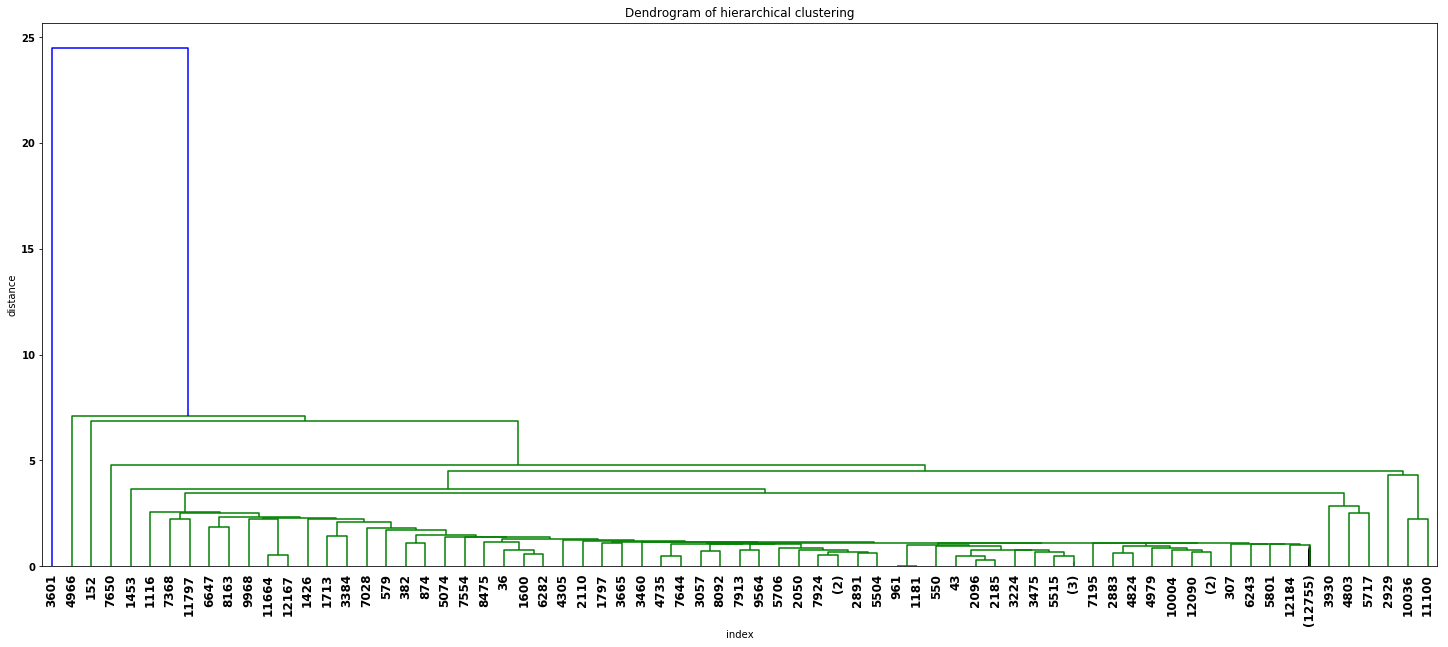

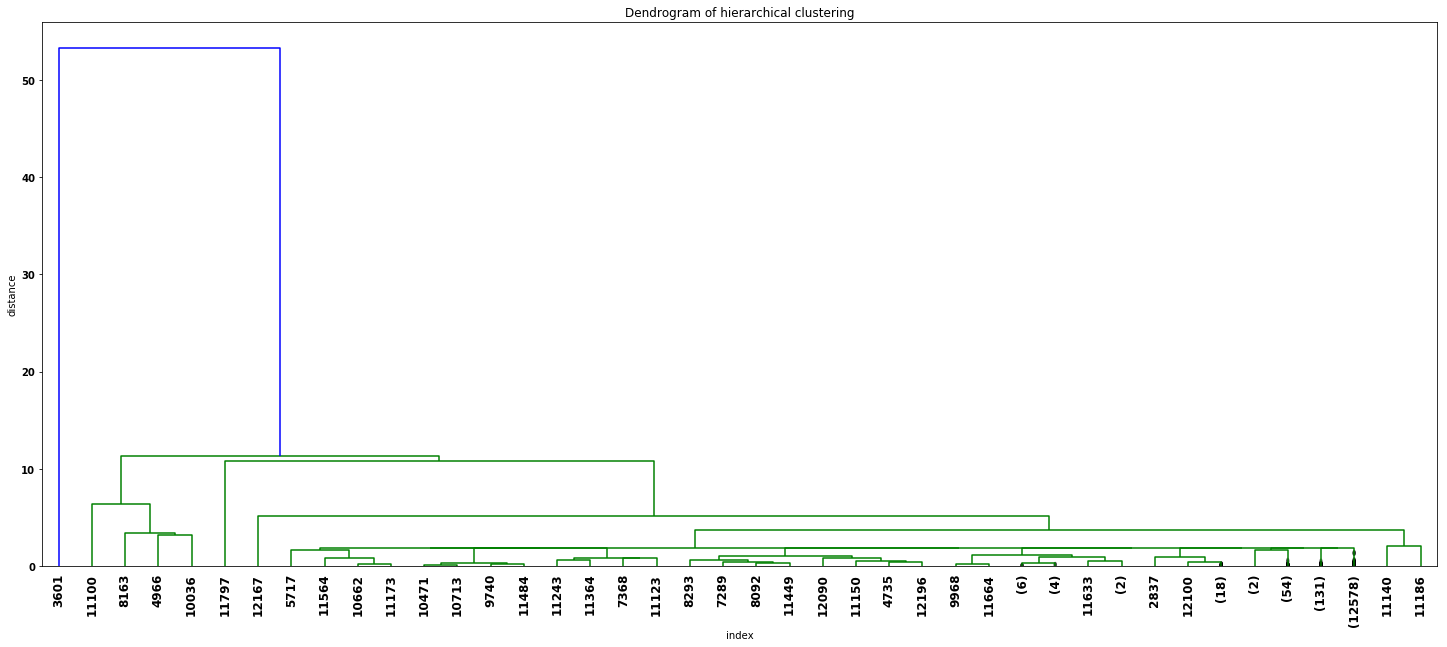

In [60]:
#####################################
#   LINKAGE MATRIX AND DENDROGRAM   #
#####################################
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#Linkage matrix
Z = linkage(rfm_norm, 'single')
Z_mod = linkage(rfm_norm_mod, 'single')

# Dendrogram visualization
plt.figure(figsize=(25, 10));
plt.title('Dendrogram of hierarchical clustering for rfm');
plt.xlabel('index');
plt.ylabel('distance');

# Visualisation only of the top part of the dendrogram - it would be too big otherwise
dendrogram(
    Z,
    truncate_mode='level',
    p = 30,
    leaf_rotation=90., 
    leaf_font_size=12., 
    show_contracted=True
)
plt.show()
#The visualization didn't help me very much
#Most of the clustering is at one point (index 12755)

# Dendrogram visualization for modified data
plt.figure(figsize=(25, 10));
plt.title('Dendrogram of hierarchical clustering for modified rfm');
plt.xlabel('index');
plt.ylabel('distance');

# Visualisation only of the top part of the dendrogram - it would be too big otherwise
dendrogram(
    Z_mod,
    truncate_mode='level',
    p = 10,
    leaf_rotation=90., 
    leaf_font_size=12., 
    show_contracted=True
)
plt.show()

In [67]:
###################################################################
#                        ELBOW METHOD RFM                         #
#    SEARCHING FOR THE RIGHT PARAMETER K FOR K-MEANS ALGORITHM    #
###################################################################

from sklearn.cluster import KMeans
import numpy as np

#Array of parameters k
ix = np.zeros(20)
#Sum of squared distances of samples to their closest cluster center.
iy = np.zeros(20)
cluster_labels = [];
#Repeat alhgorithm KMeans many times and save the sums of squared distances to closest cluster centers
for k in range(ix.shape[0]):
    kmeans = KMeans(n_clusters=k+1, random_state = 1)
    kmeans.fit(rfm_norm)
    iy[k] = kmeans.inertia_
    cluster_labels.append(kmeans.labels_);
    ix[k] = k+1

In [66]:
###################################################################
#                   ELBOW METHOD MODIFIED RFM                     #
#    SEARCHING FOR THE RIGHT PARAMETER K FOR K-MEANS ALGORITHM    #
###################################################################

from sklearn.cluster import KMeans
import numpy as np

#Array of parameters k
ix_mod = np.zeros(20)
#Sum of squared distances of samples to their closest cluster center.
iy_mod = np.zeros(20)
cluster_labels_mod = [];
#Repeat alhgorithm KMeans many times and save the sums of squared distances to closest cluster centers
for k in range(ix.shape[0]):
    kmeans = KMeans(n_clusters=k+1, random_state = 1)
    kmeans.fit(rfm_norm_mod)
    iy_mod[k] = kmeans.inertia_
    cluster_labels_mod.append(kmeans.labels_);
    ix_mod[k] = k+1

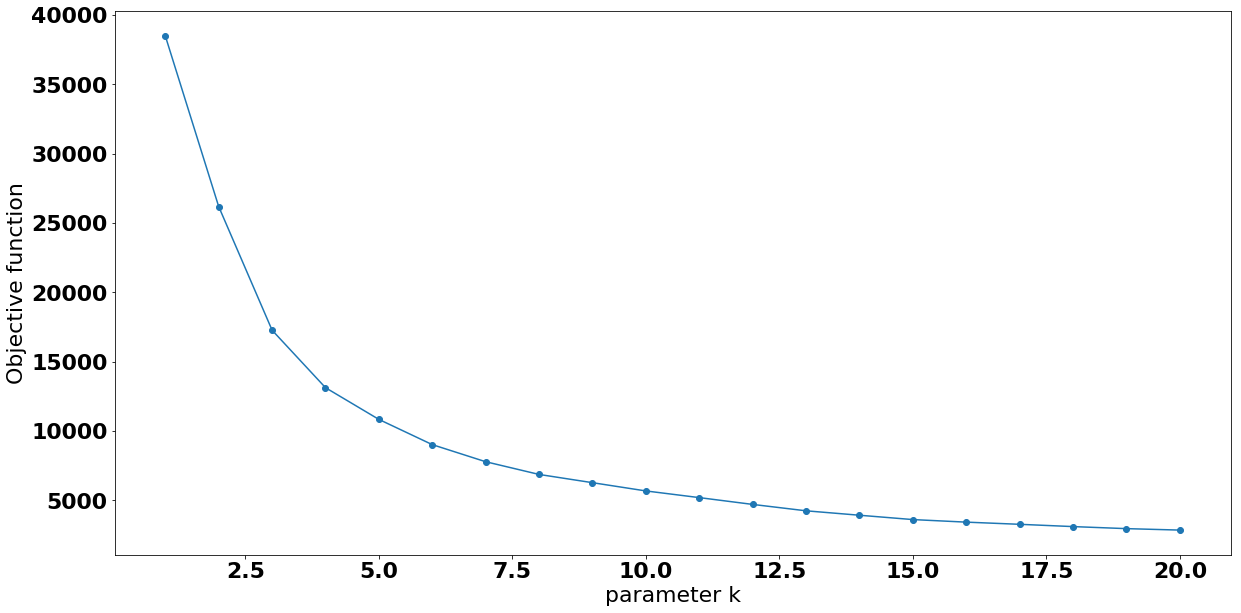

For modified RFM:



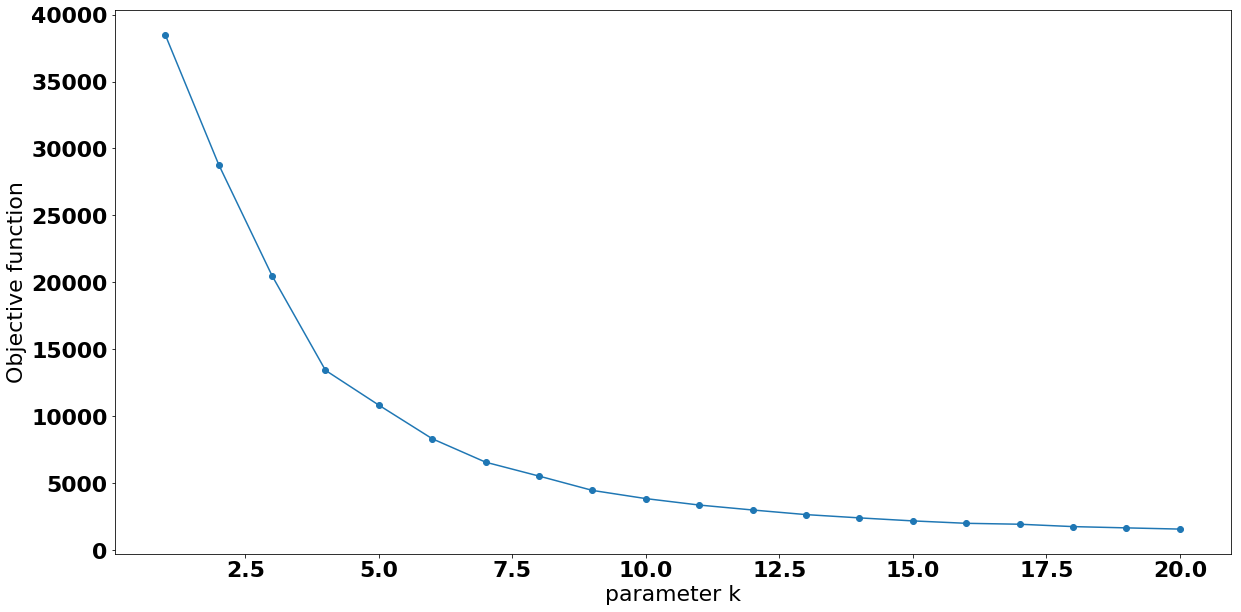

In [68]:
#############################################################################
#                               ELBOW METHOD                                #
#    VISUALISATION OF PARAMETER K FOR DIFFERENT RUNS OF KMEANS ALGORITHM    #
#############################################################################

#font settings for the graph
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

#show the graph
plt.rc('font', **font)
plt.figure(figsize=(20, 10));
plt.xlabel('parameter k');
plt.ylabel('Objective function');
plt.plot(ix, iy, 'o-')
plt.show()

#The optimal number of clusters is somehow subjective and this data set is very difficult to visualize
#Therefore the number of clusters for the KMeans algorithm is estimated with the help of the graph of objective function
#From the visualization, we can see, that the direction of the function changes a lot at point 3 and then at also in smaller amount at point 4
#Usual practice is to choose a number of cluster, such that adding another cluster doesn’t improve
#much better the total sum square of distances, by looking at the graph, such number is k = 3, 
#but I will choose number k = 4 (it is another point where the decline of the function gets smaller 
#,although not as much as at point 3. Choosing the number of clusters is a bit of magic, value 4 seems better to me)
#The right parameter k depends a lot on what information we expect to get from the data...
#sometimes we want small number of clusters, sometimes otherwise.

print("For modified RFM:\n");

#font settings for the graph
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

#show the graph
plt.rc('font', **font)
plt.figure(figsize=(20, 10));
plt.xlabel('parameter k');
plt.ylabel('Objective function');
plt.plot(ix_mod, iy_mod, 'o-')
plt.show()

#for modfied rfm dataset i will also choose k = 4, at k=4 is a nice elbow

In [69]:
############################
#    K-MEANS CLUSTERING    #
############################
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters = k, random_state = 1).fit(rfm_norm)
# result clusters
clusters = kmeans.labels_;
kmeans = KMeans(n_clusters = k, random_state = 1).fit(rfm_norm_mod)
# result clusters
clusters_mod = kmeans.labels_;
print(clusters);
print(clusters_mod);

[1 3 3 ... 1 1 1]
[3 0 0 ... 3 3 3]


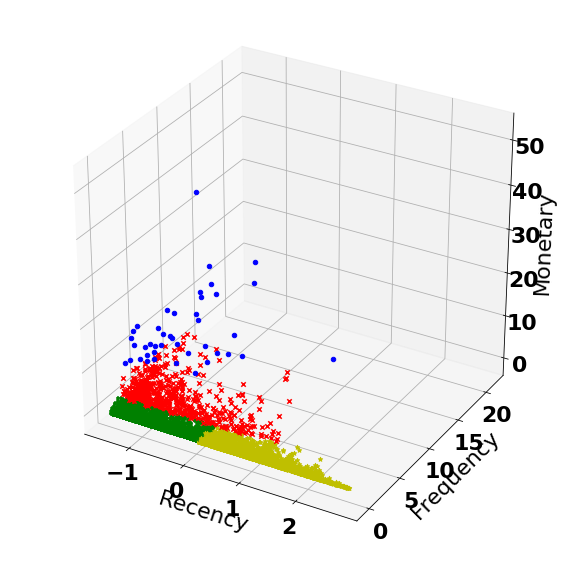

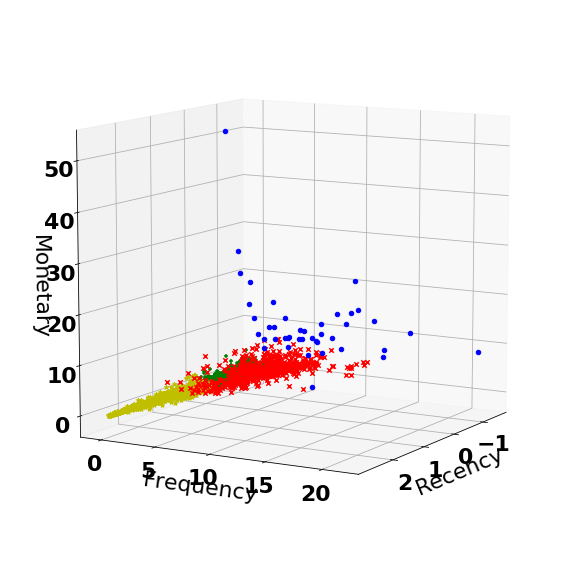

In [7]:
#################################
#    CLUSTERS INTERPRETATION    #
#################################

#generate the plot
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
np.random.seed(42)
fig1 = plt.figure(figsize=(10,10),facecolor='w', edgecolor='k')
fig2 = plt.figure(figsize=(10,10),facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111, projection='3d')
ax2 = fig2.add_subplot(111, projection='3d')

for idx, row in enumerate(rfm_norm):
    recency   = row[0];
    frequency = row[1];
    monetary  = row[2];
    color = ['r','g','b','y'][clusters[idx]];
    mark = ['x','+','o','*'][clusters[idx]];
    ax1.scatter(recency, frequency, monetary, c=color, marker=mark)
    ax2.scatter(recency, frequency, monetary, c=color, marker=mark)
    

ax2.view_init(elev=10., azim=30)
    
ax1.set_xlabel('Recency');
ax1.set_ylabel('Frequency');
ax1.set_zlabel('Monetary');

ax2.set_xlabel('Recency');
ax2.set_ylabel('Frequency');
ax2.set_zlabel('Monetary');

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}

#show the graph
plt.rc('font', **font)

plt.show()

#It is difficult to visualize the clusters, therefore I plotted the graph twice, from different angles
#Looking at the graph, I am think parameter k=3 would have been a better choice

#The blue cluster - these are the most interesting customers
#Customers who paid a lot in total, they might be returning customers, or just one time buyers
#Most of them were recent buyers

#The green cluster - these are the new customers who tried the eshop for few times, but did not spend very much money yet
#Not returning recent customer who did not spend very much money 

#The greenish yellow cluster - these are the least interesting customers
#Not returning old customer who did not spend very much money 

#The red cluster - this is the customer base, which is probably very important for the eshop
#These are customers who spend moderate amount of money, they are also often frequent buyers (shopped multiple times)
#More of them are active, but some of them did not buy anything for a long time

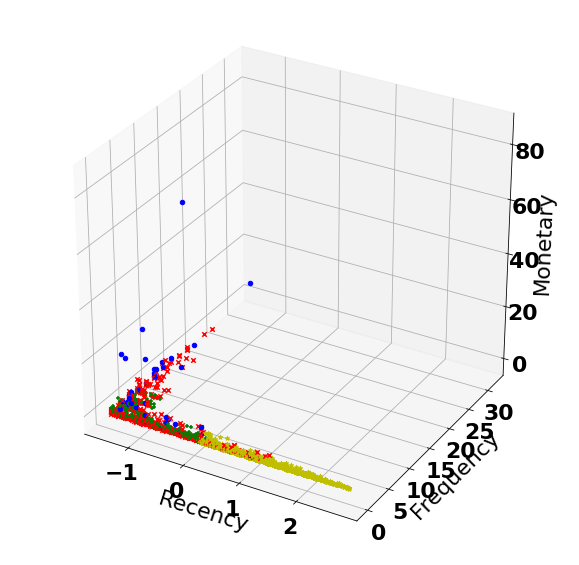

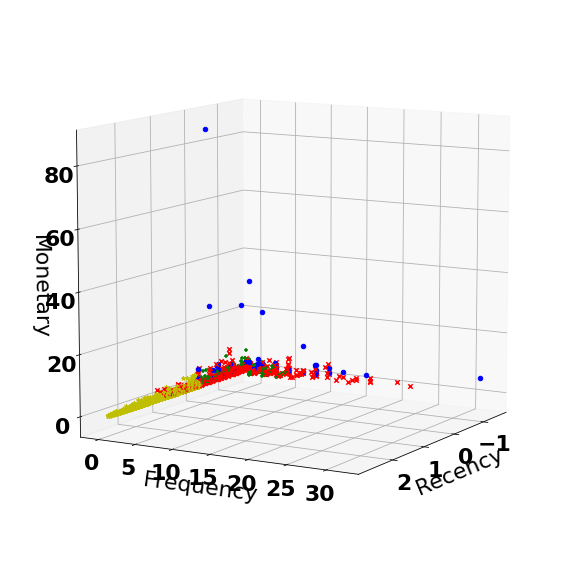

In [70]:
############################################
#    CLUSTERS INTERPRETATION MODIFIED RFM  #
############################################

#generate the plot
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
np.random.seed(42)
fig1 = plt.figure(figsize=(10,10),facecolor='w', edgecolor='k')
fig2 = plt.figure(figsize=(10,10),facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111, projection='3d')
ax2 = fig2.add_subplot(111, projection='3d')

for idx, row in enumerate(rfm_norm_mod):
    recency   = row[0];
    frequency = row[1];
    monetary  = row[2];
    color = ['r','g','b','y'][clusters[idx]];
    mark = ['x','+','o','*'][clusters[idx]];
    ax1.scatter(recency, frequency, monetary, c=color, marker=mark)
    ax2.scatter(recency, frequency, monetary, c=color, marker=mark)
    

ax2.view_init(elev=10., azim=30)
    
ax1.set_xlabel('Recency');
ax1.set_ylabel('Frequency');
ax1.set_zlabel('Monetary');

ax2.set_xlabel('Recency');
ax2.set_ylabel('Frequency');
ax2.set_zlabel('Monetary');

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}

#show the graph
plt.rc('font', **font)

plt.show()

#The clusters seem too overlapped, but it might not be true, maybe it just looks like it, 
#because of the wrong scaling of the graph (The blue cluster has way too different values and messes up the graph size
#same as before:
#The blue cluster - Most profitable customers, frequent, recent buyers and the ones who pay a lot
#The green cluster - Recent customer who do not shop frequently
#The greenish yellow cluster - The least profitable 
#The red cluster - this is the customer base



Number of clusters =  1 ; silhouette score =  0.7225757362117112
Number of clusters =  2 ; silhouette score =  0.4699765808631902
Number of clusters =  3 ; silhouette score =  0.4828637686460182
Number of clusters =  4 ; silhouette score =  0.48912186171177235
Number of clusters =  5 ; silhouette score =  0.41769350033133457
Number of clusters =  6 ; silhouette score =  0.4191077067567834
Number of clusters =  7 ; silhouette score =  0.4268346708152304
Number of clusters =  8 ; silhouette score =  0.37362308758057344
Number of clusters =  9 ; silhouette score =  0.3750320345374029
Number of clusters =  10 ; silhouette score =  0.39611044543155877
Number of clusters =  11 ; silhouette score =  0.3980077704085492
Number of clusters =  12 ; silhouette score =  0.40328492278229855
Number of clusters =  13 ; silhouette score =  0.4034648965588476
Number of clusters =  14 ; silhouette score =  0.38489321868050863
Number of clusters =  15 ; silhouette score =  0.386862388524158
Number of clus

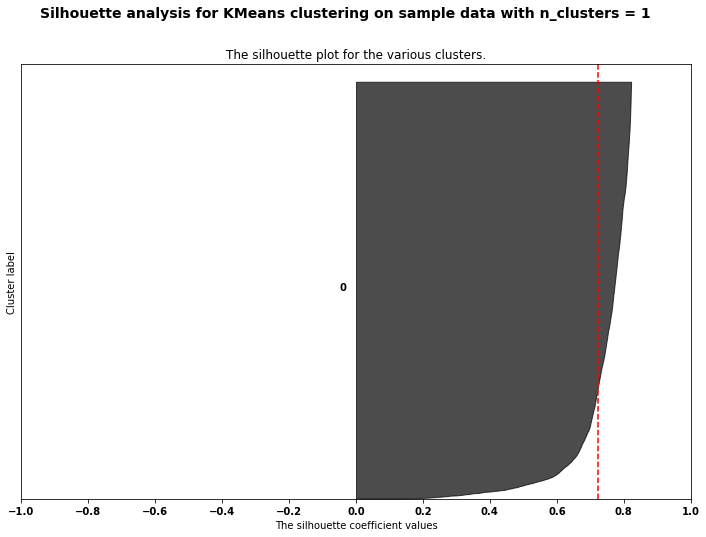

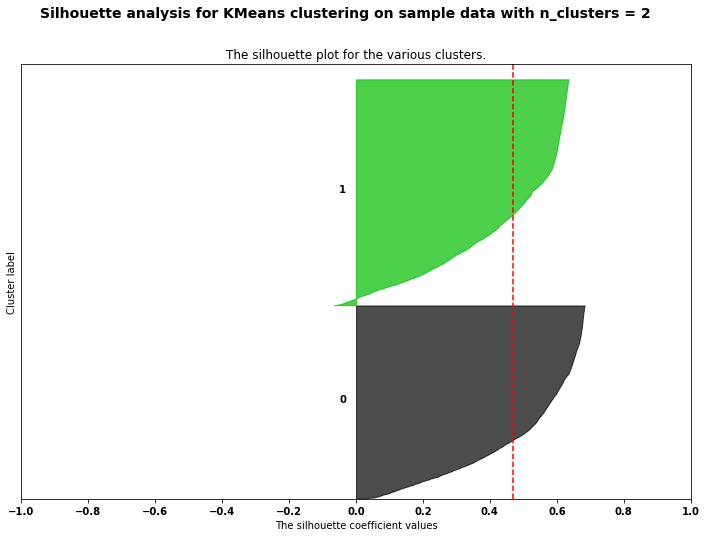

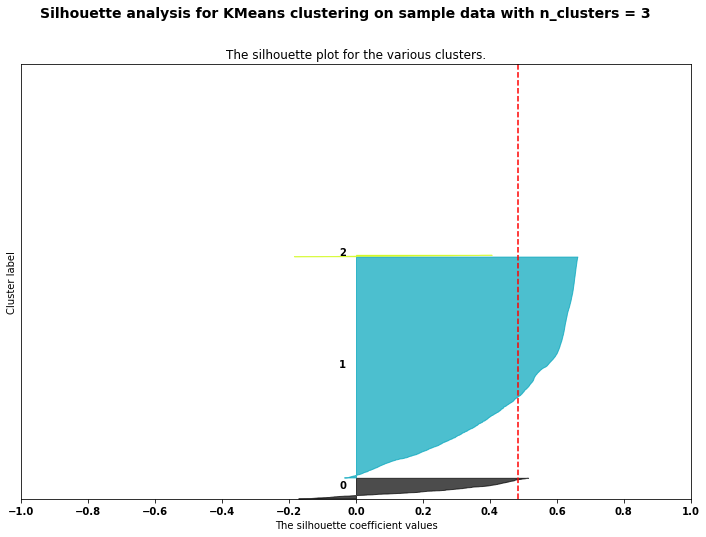

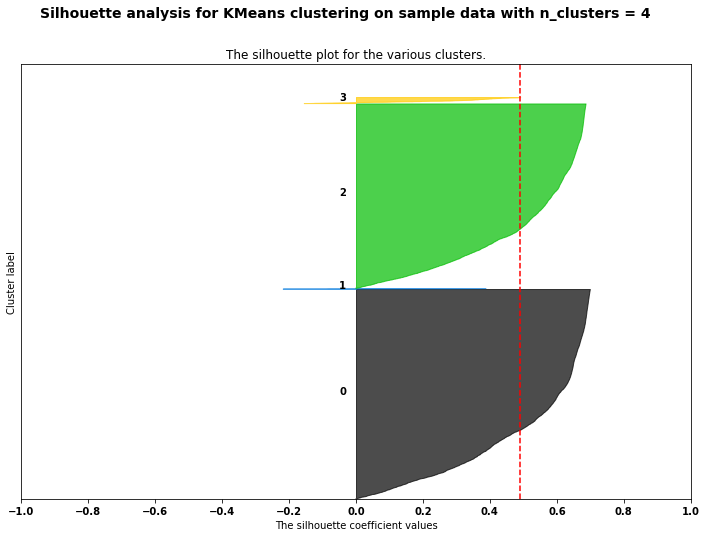

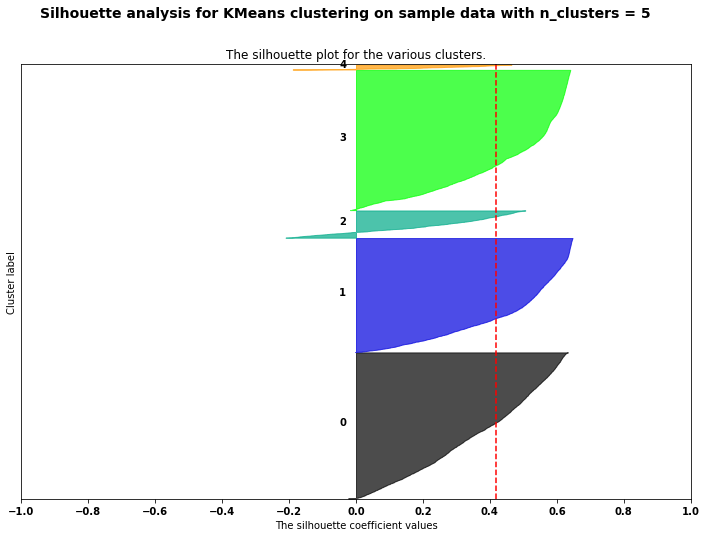

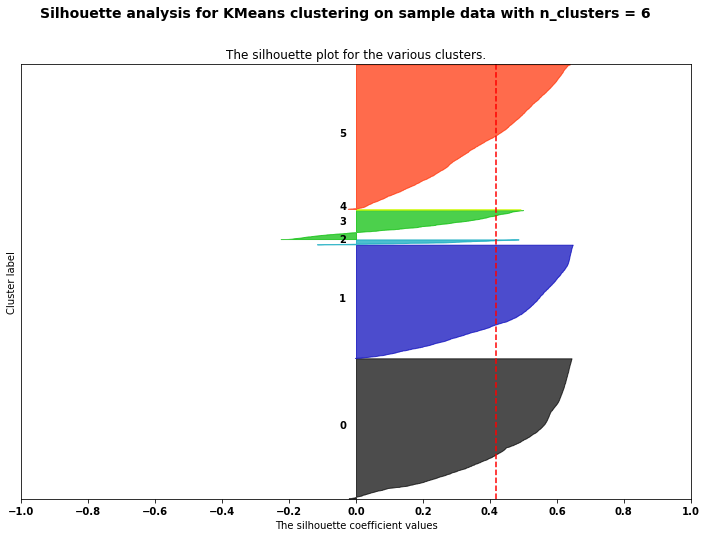

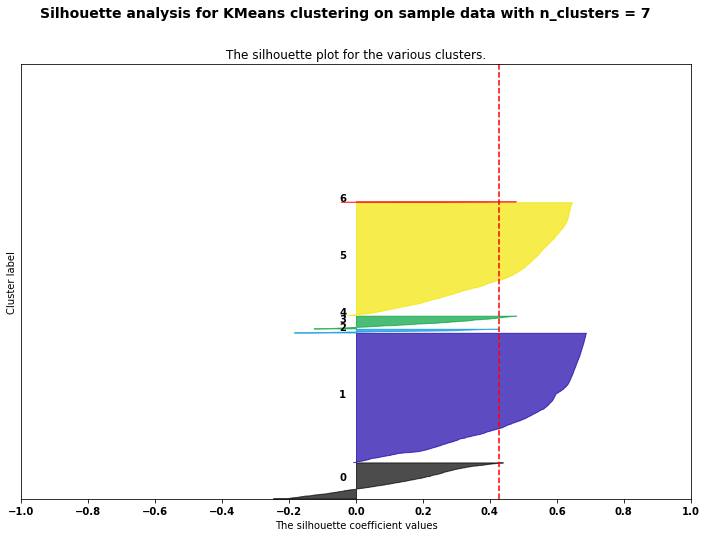

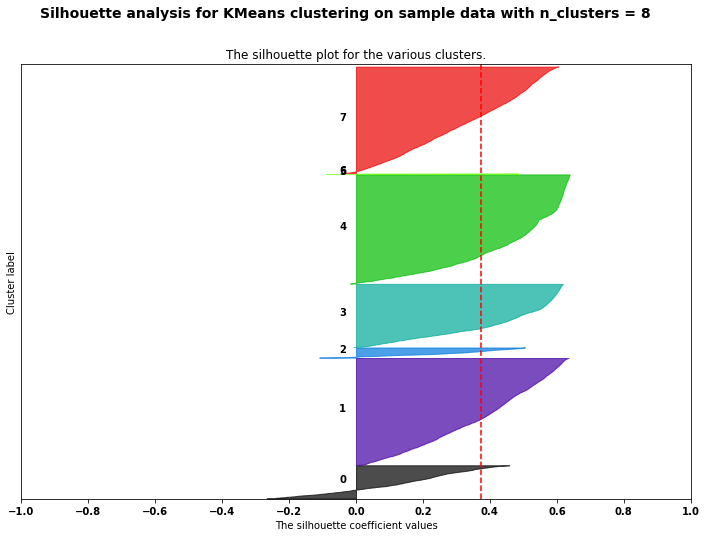

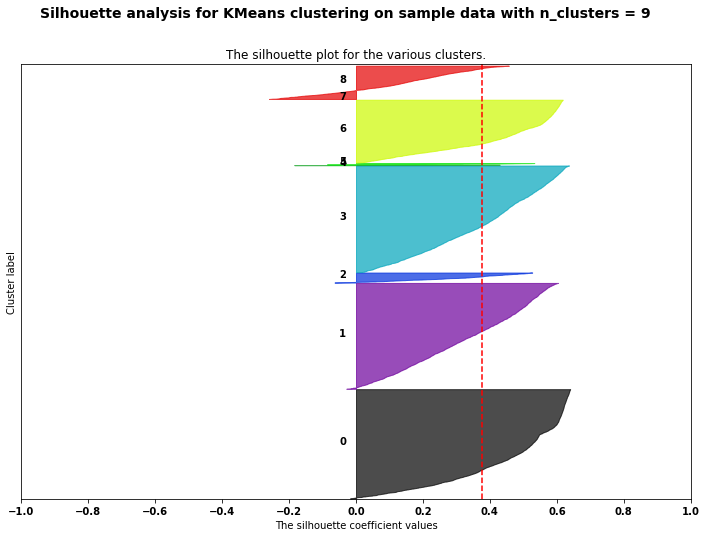

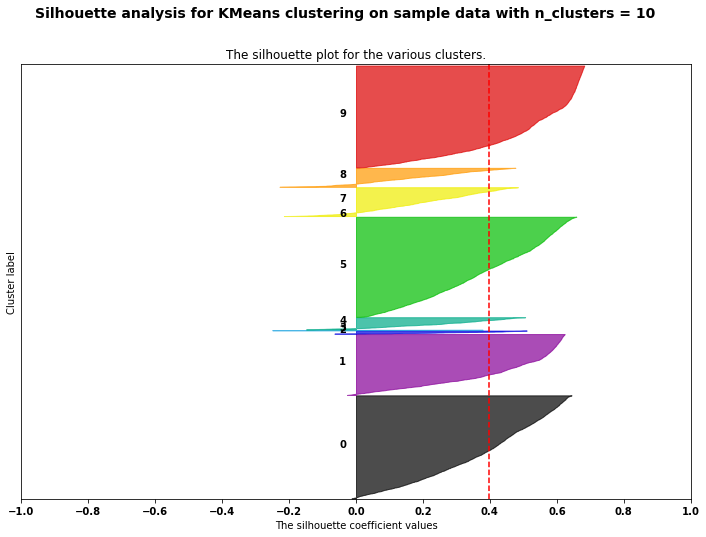

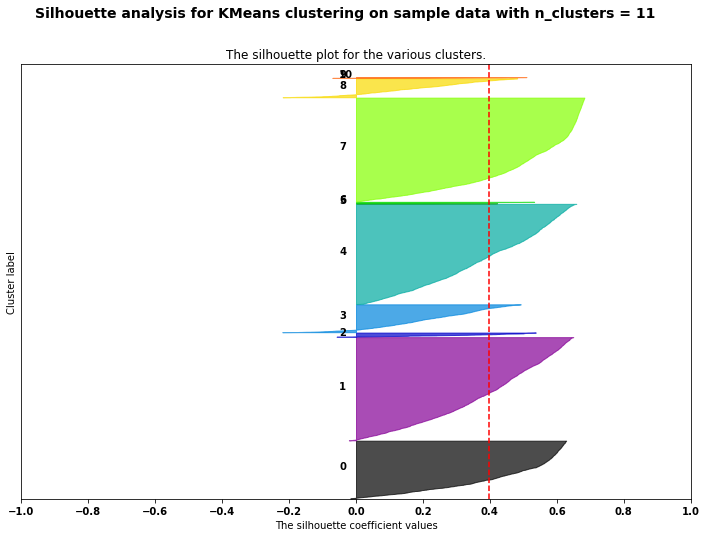

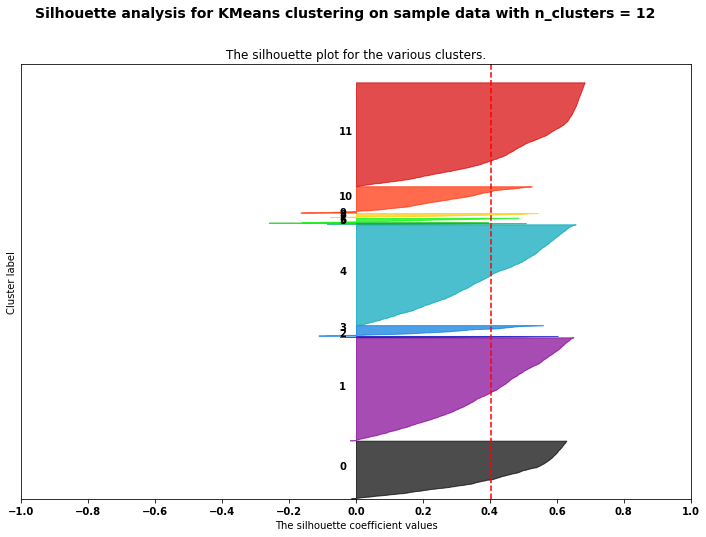

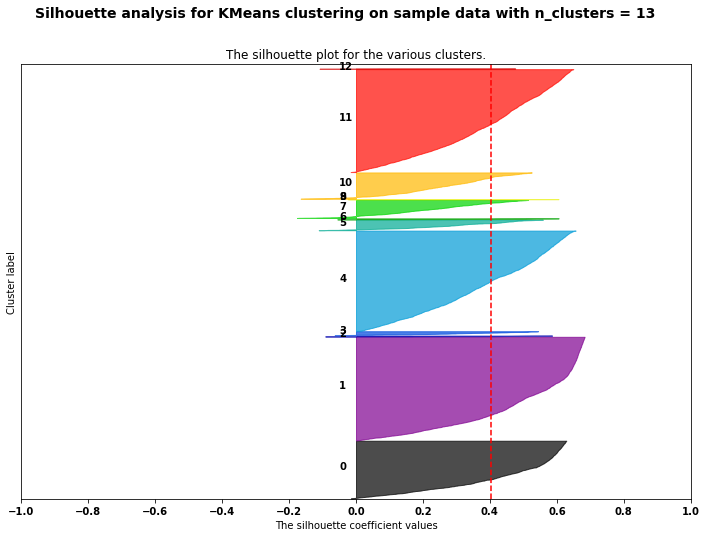

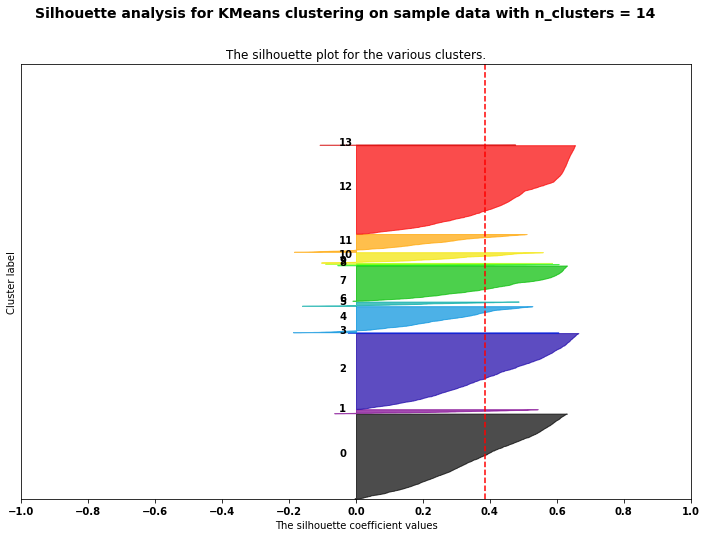

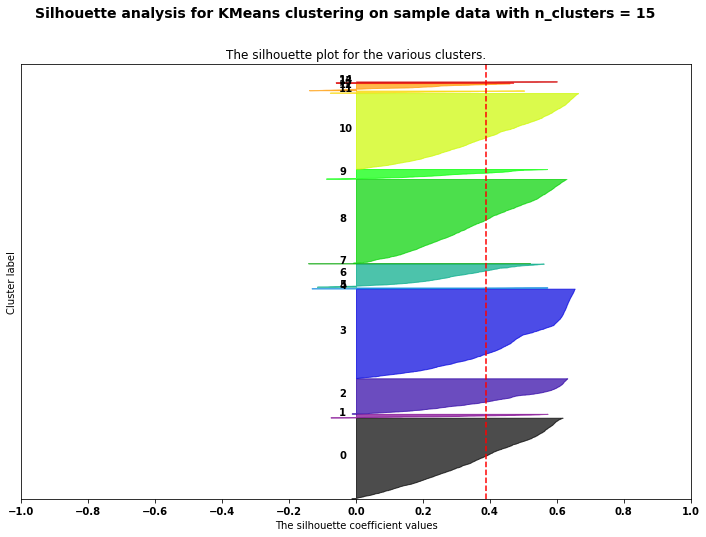

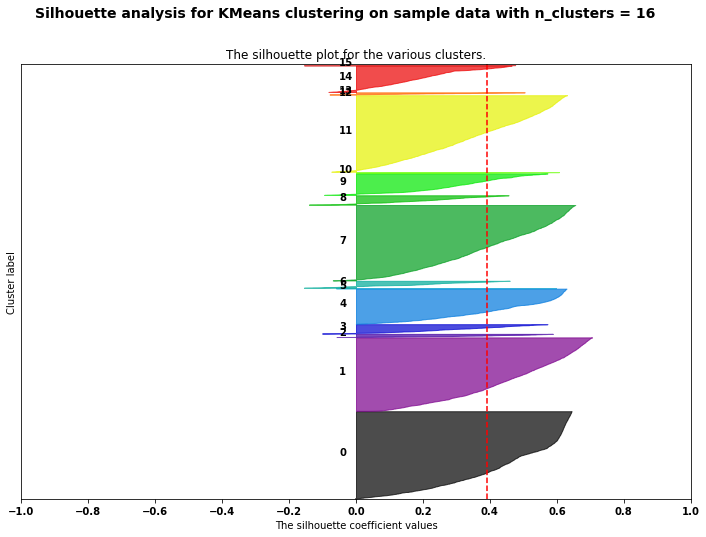

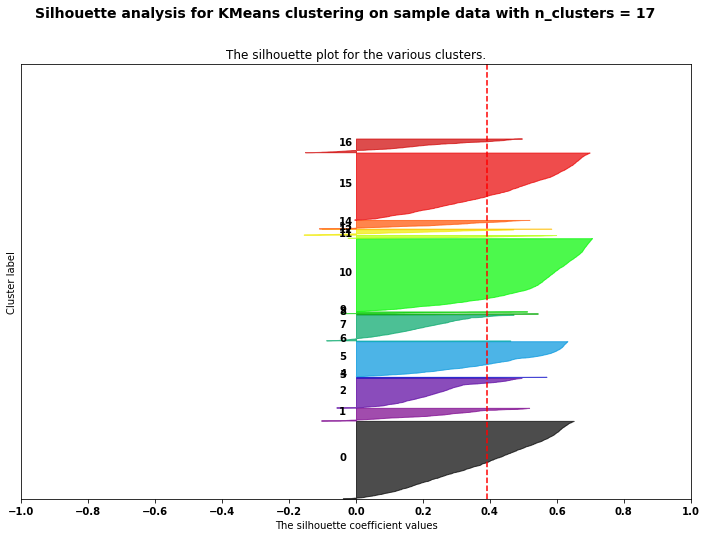

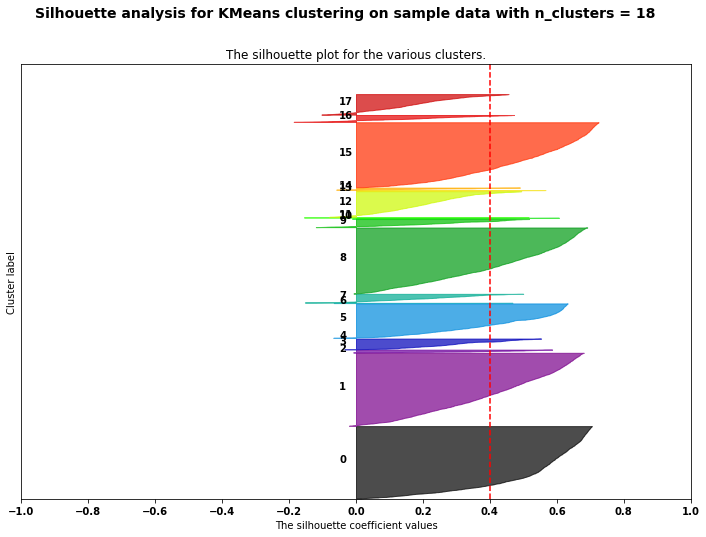

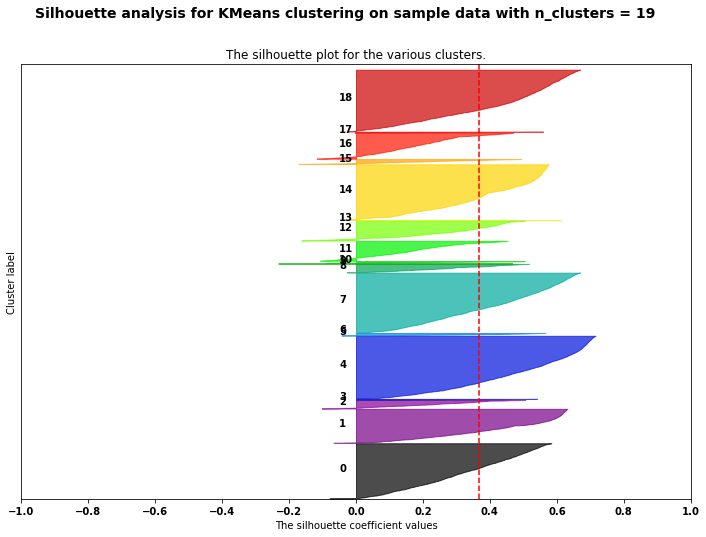

In [14]:
#########################
#   SILHOUETTE METHOD   #
#########################

#This is the tutorial on silhouette method I followed:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#I already computed the clusters for parameters k=0...19
for n_clusters in range(1,ix.shape[0]):
    #cluster labels that were computed before
    clusters = cluster_labels[n_clusters];

    #we want to visualize the cluster for each parameter k
    fig, (ax1) = plt.subplots(1, 1,figsize=(12,8))
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(rfm) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.    
    silhouette_avg = silhouette_score(rfm_norm, clusters)
    print("Number of clusters = ", n_clusters,"; silhouette score = ", silhouette_avg)

    sample_silhouette_values = silhouette_samples(rfm_norm, clusters)

    #visualization
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i];
        ith_cluster_silhouette_values.sort();

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()

#The silhouette plot shows that the n_clusters value of 3 and above are a bad pick,
#due to wide fluctuations in the size of the silhouette plots. 
#The best score is for n_clusters = 1, but putting the data to just one cluster is pretty much useless
#For parameter k = 2, the silhouette graph looks quite well
#If splitting the data to 2 clusters is too little information benefit, another reasenable choice for parameter k
#would be k=5. The clusters for this parameter do not have that much of size fluctuation as for other parameter values.

Number of clusters =  1 ; silhouette score =  0.4605867084136474
Number of clusters =  2 ; silhouette score =  0.4994503499180823
Number of clusters =  3 ; silhouette score =  0.5008854835138828
Number of clusters =  4 ; silhouette score =  0.5217007172832598
Number of clusters =  5 ; silhouette score =  0.5225239812671115
Number of clusters =  6 ; silhouette score =  0.45148352953747256
Number of clusters =  7 ; silhouette score =  0.45587238151817033
Number of clusters =  8 ; silhouette score =  0.47401673834848723
Number of clusters =  9 ; silhouette score =  0.42817742877449855
Number of clusters =  10 ; silhouette score =  0.4351273081352305
Number of clusters =  11 ; silhouette score =  0.4387681800477041
Number of clusters =  12 ; silhouette score =  0.4247668294170501
Number of clusters =  13 ; silhouette score =  0.42545388679517415
Number of clusters =  14 ; silhouette score =  0.43964902521055305
Number of clusters =  15 ; silhouette score =  0.44019323848965747
Number of cl

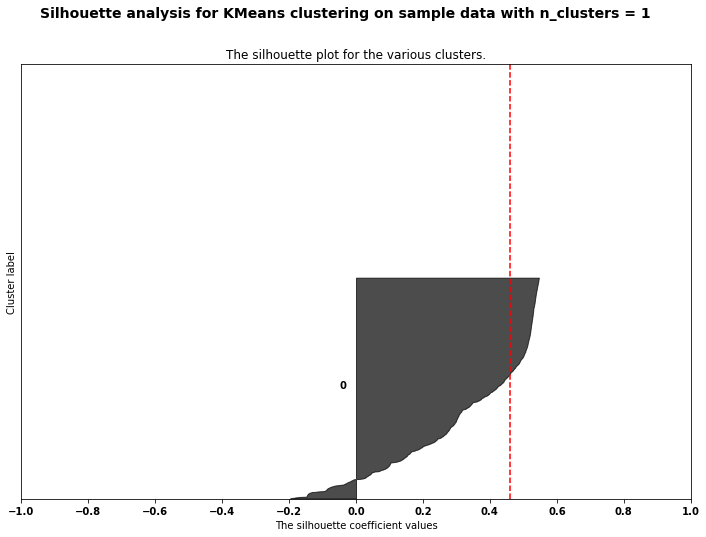

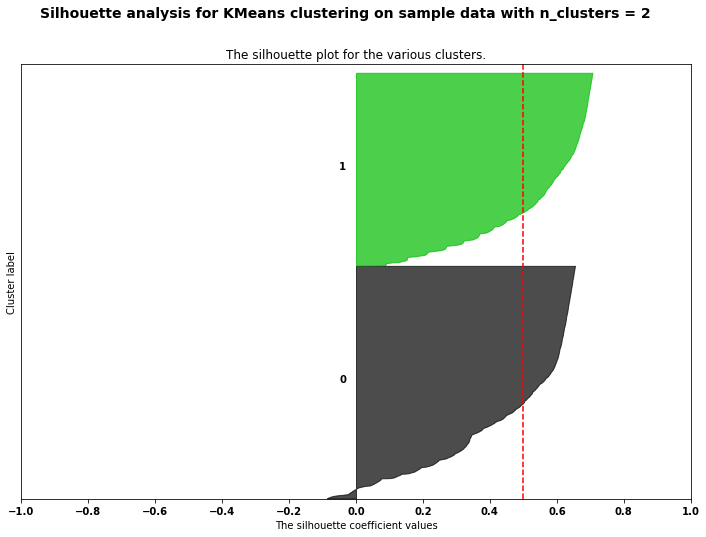

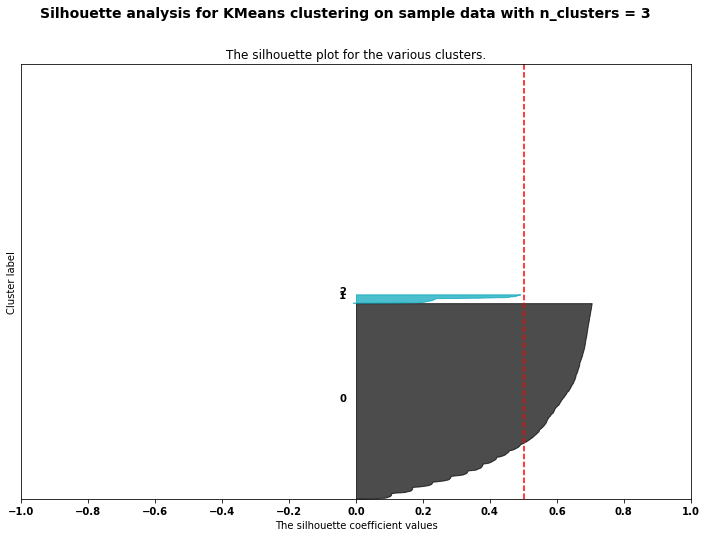

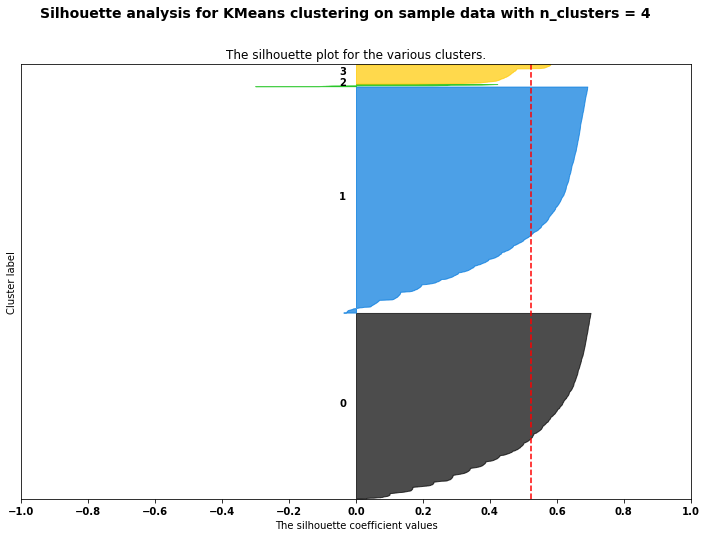

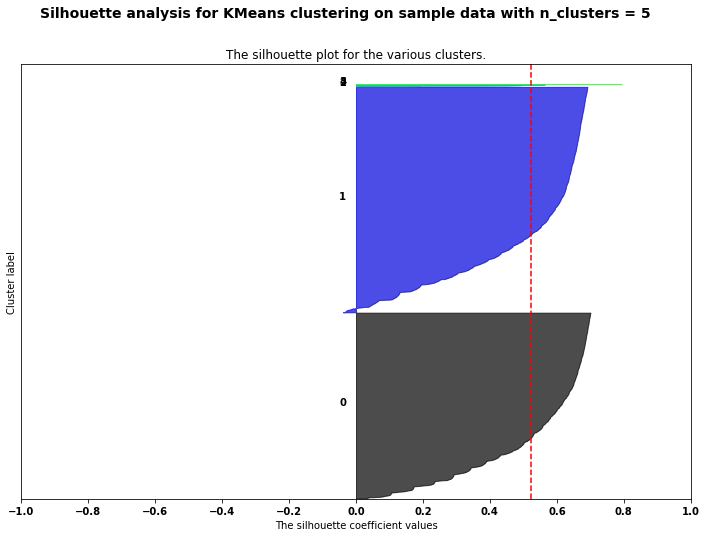

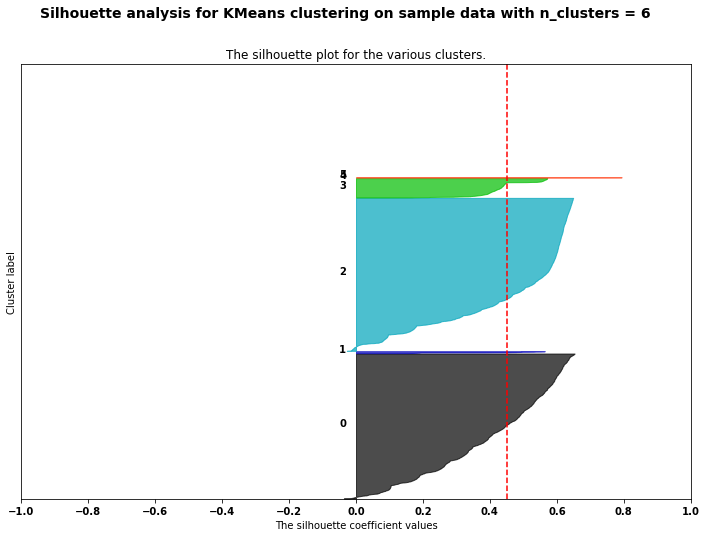

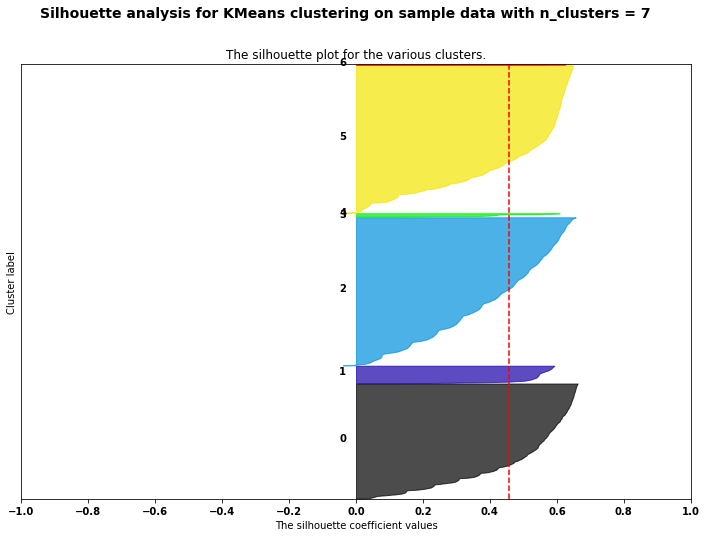

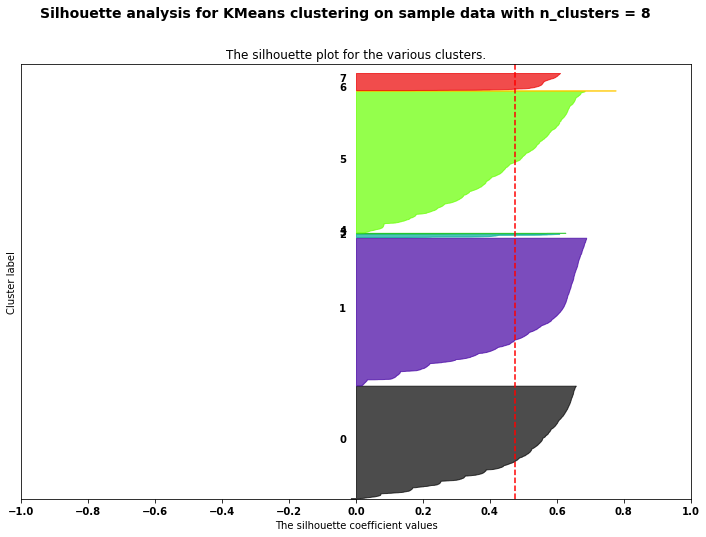

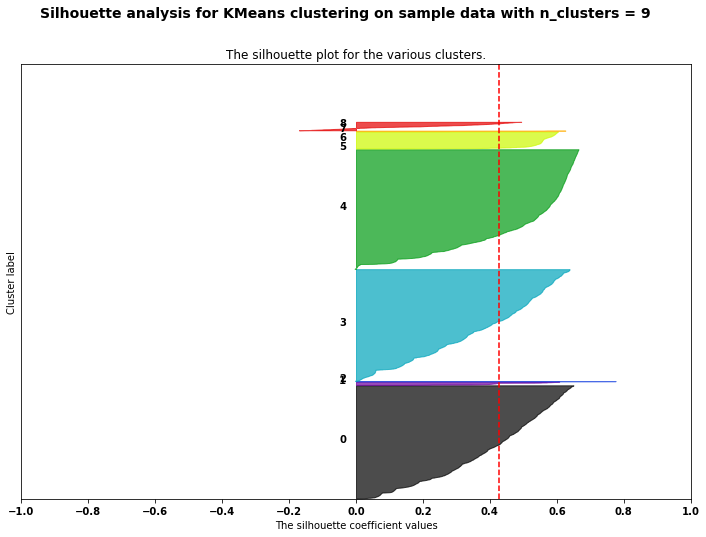

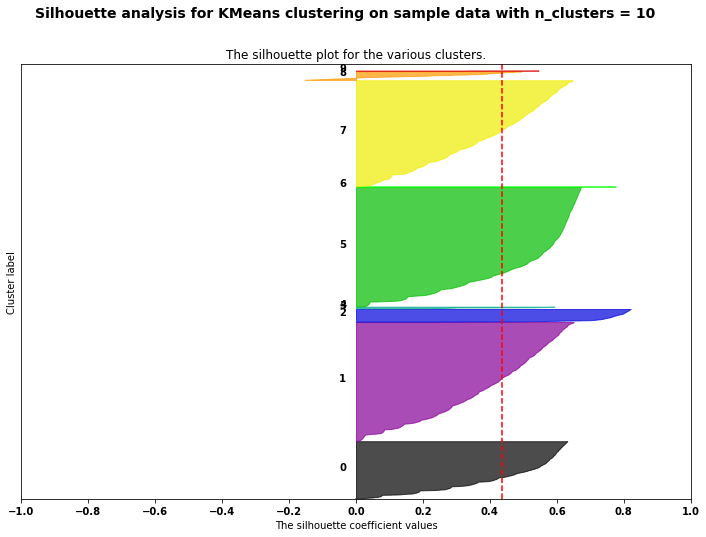

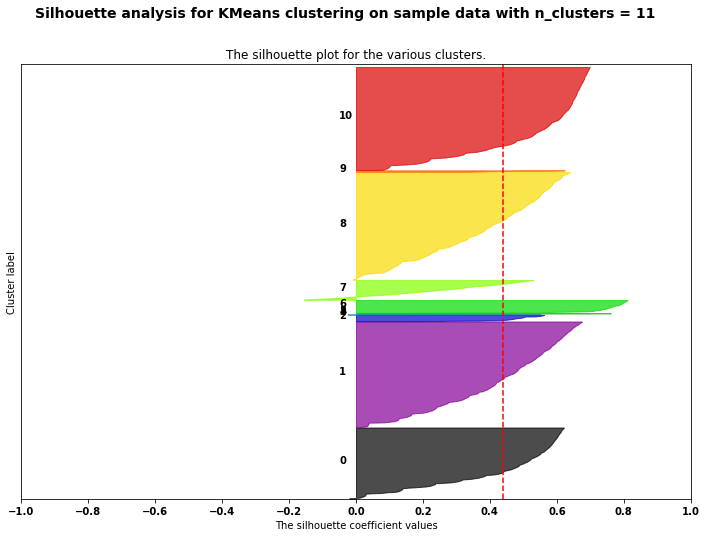

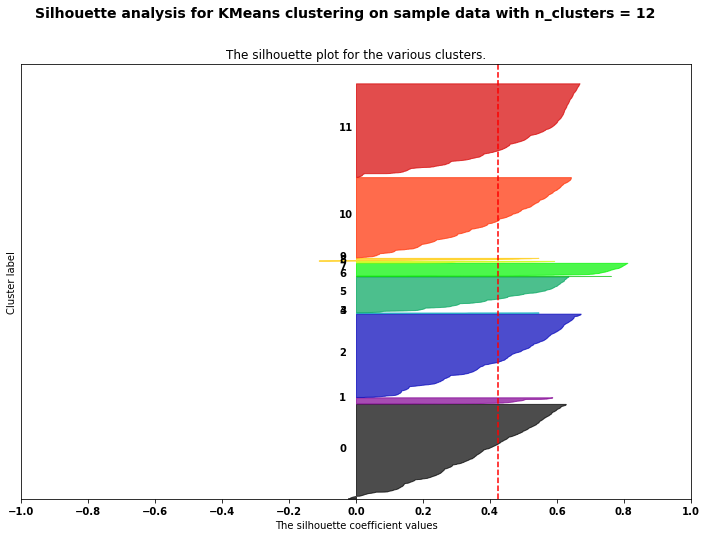

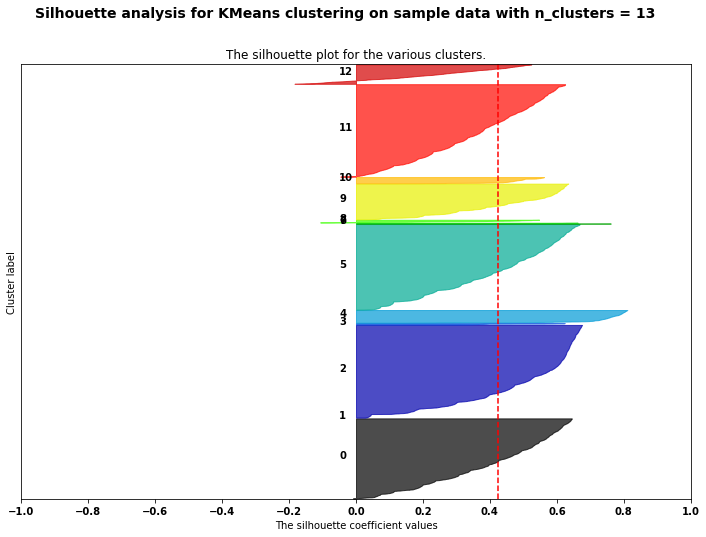

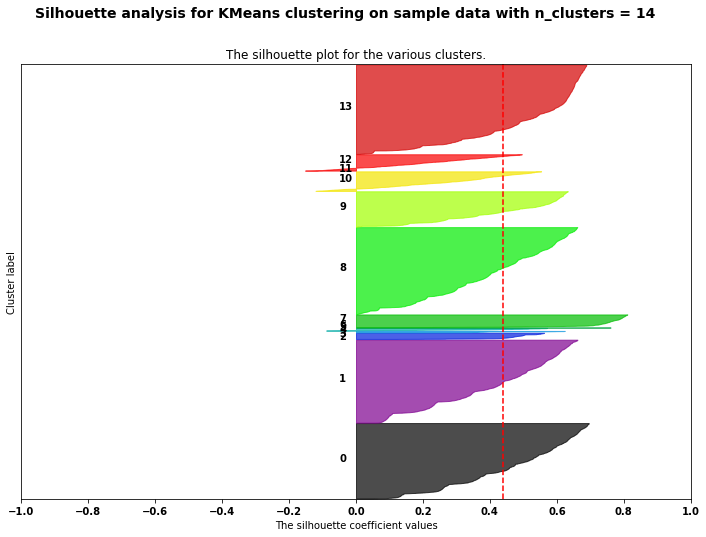

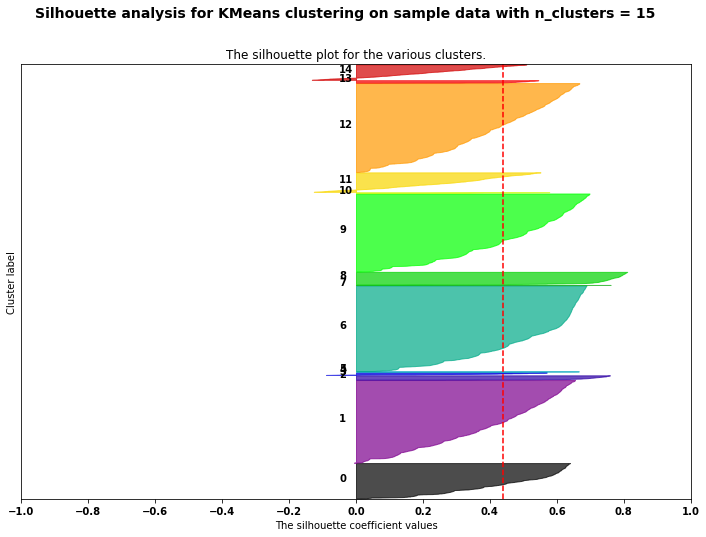

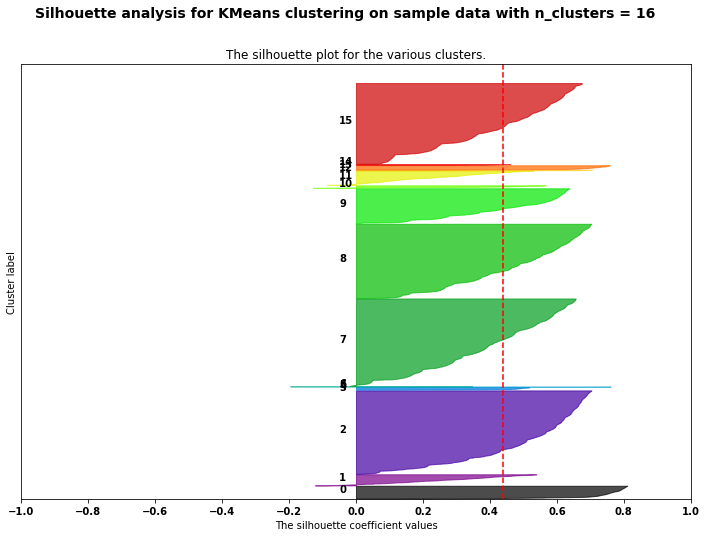

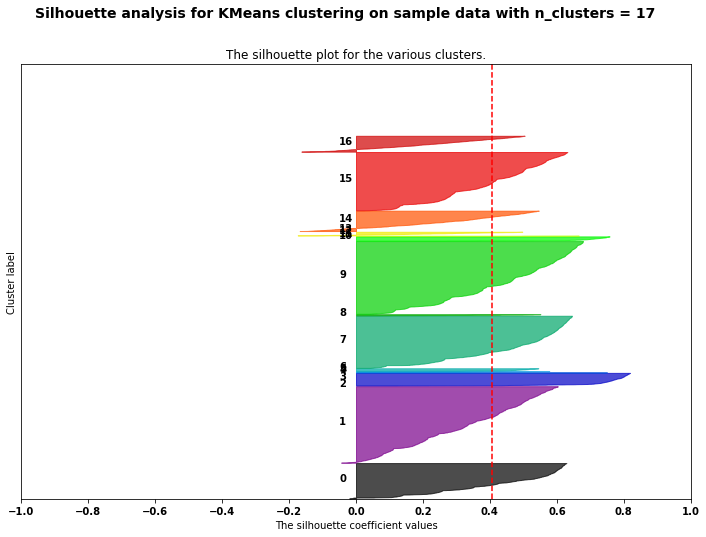

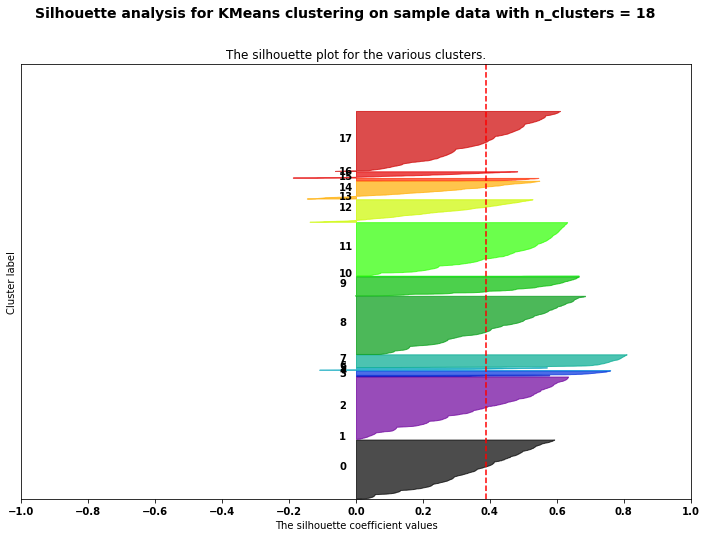

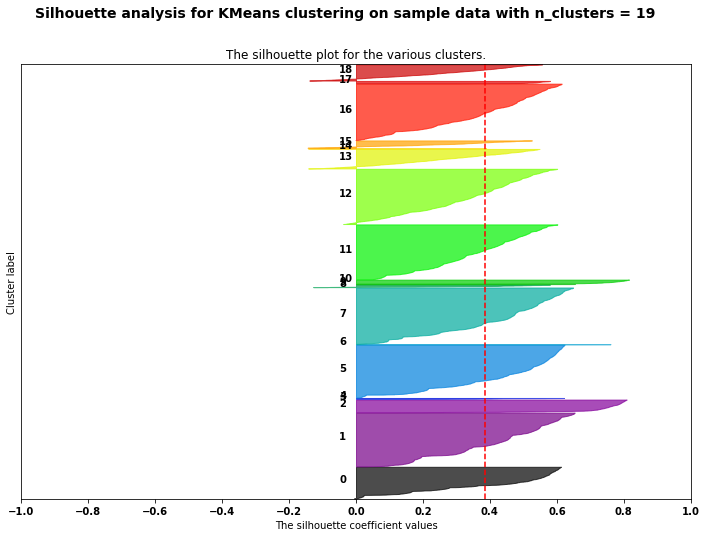

In [71]:
#####################################
#   SILHOUETTE METHOD MODIFIED RFM  #
#####################################

#

from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#I already computed the clusters for parameters k=0...19
for n_clusters in range(1,ix_mod.shape[0]):
    #cluster labels that were computed before
    clusters = cluster_labels_mod[n_clusters];

    #we want to visualize the cluster for each parameter k
    fig, (ax1) = plt.subplots(1, 1,figsize=(12,8))
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(rfm) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.    
    silhouette_avg = silhouette_score(rfm_norm_mod, clusters)
    print("Number of clusters = ", n_clusters,"; silhouette score = ", silhouette_avg)

    sample_silhouette_values = silhouette_samples(rfm_norm_mod, clusters)

    #visualization
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i];
        ith_cluster_silhouette_values.sort();

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()

#The silhouette plot shows that the n_clusters value of 3 and above are a bad pick,
#due to wide fluctuations in the size of the silhouette plots. 
#The best score is for n_clusters = 5
#For parameter k = 2, the silhouette graph looks quite well, therefore I think k=2 is probably the best choice for parameter k